In [ ]:
import time
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statistics
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import math


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data_old = pd.read_csv("FinalData.csv")
# data = data_old.replace('',np.nan)
# data = data.dropna(axis="rows", how="any")

data = pd.read_csv("FinalData.csv")
data = data.iloc[::-1]

print(data.head())


                          DateCGM  ...  Value Bolus
35099  2017-07-24 18:59:42.000014  ...          0.0
35098  2017-07-24 18:59:44.000003  ...          0.0
35097  2017-07-24 19:00:01.000001  ...          0.0
35096  2017-07-24 19:02:03.000003  ...          0.0
35095  2017-07-24 19:30:36.999990  ...          0.0

[5 rows x 4 columns]


35100


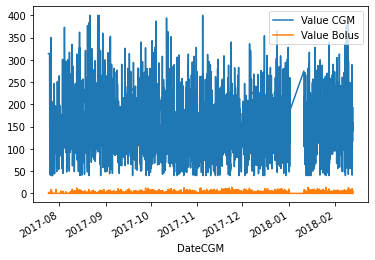

In [ ]:
data.index = pd.to_datetime(data["DateCGM"])
data.plot()
print(len(data["Value CGM"]))
# print(dt.datetime.now)

In [ ]:
# decompose_data = seasonal_decompose(data, model="additive")
# decompose_data.plot();

In [ ]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("start time: "+current_time)
# Set SARIMAX parameters
pdq = (1 ,1, 1) #p,d,q
PDQm = (1, 0, 1, 12) #P,D,Q,m

# Define model based on training data
train_model = sm.tsa.SARIMAX(data["Value CGM"][:28000], order=pdq, seasonal_order=PDQm)
# Fit the model
train_model_fit = train_model.fit()

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("end time: "+current_time)

start time: 04:51:34


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


end time: 04:52:00


In [ ]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("start time: "+current_time)

train_model = sm.tsa.SARIMAX(data["Value CGM"], order=pdq, seasonal_order=PDQm)
# Fit the model
test_model_fit = train_model.filter(train_model_fit.params)

# Run the predictions (40000 is the beginning of the test records)
predict_test = test_model_fit.get_prediction(start=28001, end=35100, dynamic=False, full_results=True)
predict_test = predict_test.predicted_mean

# Predictions is used to hold the predicted values
predictions = []

# Loop through each value in the test data and check it against the prediction

print(len(predict_test))
for i in range(28001,35100):
  predictions.append(predict_test.get(i))
  if((i - 28001) % 300 == 0):
    print('Time point = ' + str(i) + ' - Predicted value = %.3f, Expected value = %.3f ' % 
          (predict_test.get(i), data["Value CGM"][i]))
    

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("end time: "+current_time)

start time: 04:52:00


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


7100
Time point = 28001 - Predicted value = 138.634, Expected value = 139.000 
Time point = 28301 - Predicted value = 121.949, Expected value = 122.000 
Time point = 28601 - Predicted value = 117.353, Expected value = 115.000 
Time point = 28901 - Predicted value = 117.374, Expected value = 91.000 
Time point = 29201 - Predicted value = 235.438, Expected value = 245.000 
Time point = 29501 - Predicted value = 144.806, Expected value = 154.000 
Time point = 29801 - Predicted value = 90.886, Expected value = 91.000 
Time point = 30101 - Predicted value = 166.465, Expected value = 166.000 
Time point = 30401 - Predicted value = 203.372, Expected value = 212.000 
Time point = 30701 - Predicted value = 206.708, Expected value = 207.000 
Time point = 31001 - Predicted value = 85.032, Expected value = 88.000 
Time point = 31301 - Predicted value = 155.227, Expected value = 158.000 
Time point = 31601 - Predicted value = 130.990, Expected value = 130.000 
Time point = 31901 - Predicted value =


Test MSE: 183.373

Test MAE: 6.031

Test RMSE: 13.542


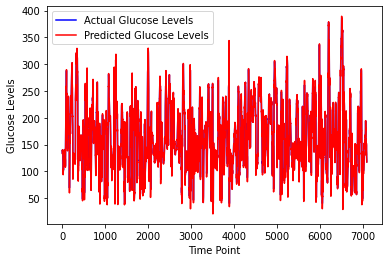

In [ ]:
# Calculate the MSE and print
mean_square = mean_squared_error(data[28001:35100]["Value CGM"], predictions)
mean_a_error = mean_absolute_error(data[28001:35100]["Value CGM"], predictions)   
rmse = sqrt(mean_square) 
print('\nTest MSE: %.3f' % mean_square)
print('\nTest MAE: %.3f' % mean_a_error)
print('\nTest RMSE: %.3f' % rmse)


# plt.figure(figsize=(20,8))
plt.plot(np.arange(7099), data[28001:35100]["Value CGM"], color='blue', label='Actual Glucose Levels')
plt.plot(np.arange(7099), predictions, color='red', label='Predicted Glucose Levels')
 
plt.xlabel('Time Point')  
plt.ylabel('Glucose Levels')  
plt.legend()  
plt.show()


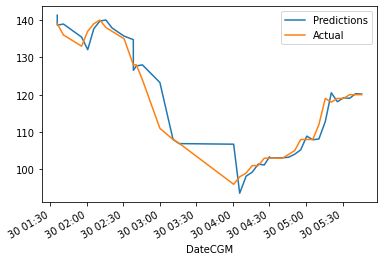

In [ ]:
# Prediction for approximately the next 8 hours of the day

predictions1 = test_model_fit.predict(28000,35098);
truth_values1 = data["Value CGM"][28001:35100];
res111 = pd.DataFrame();
res111['Predictions'] = predictions1
res111['Actual'] = truth_values1
res111

# print(len(predictions1))
# print(len(truth_values1))

predictions = test_model_fit.predict(28000,28039);
truth_values = data["Value CGM"][28001:35100].head(40);
res = pd.DataFrame();
res['Predictions'] = predictions
res['Actual'] = truth_values

# print(res['Actual'])
# print(res['Predictions'])
res

res.plot()

In [ ]:
bolus = data['Value Bolus']
train_size = 28001
end = 35100
threshold = np.mean(data[train_size:end])*0.4

# print(threshold["Value CGM"])

b_cnt = 0
idx_g = []
for i in range(train_size, train_size+len(data[28001:35100])):
  if bolus[i] > 1.0:
    b_cnt += 1
    idx_g.append(i)

cnt = 0
idx = []

for i in range(7099):
  x = res111['Predictions'][i]
  y = truth_values1[i]
  if math.isnan(y) or math.isnan(x):
    continue
  if (abs(x-y)) > threshold["Value CGM"]:
    cnt += 1
    idx.append(i)

print("Test Acc (%):", cnt/b_cnt*100)

Test Acc (%): 83.4319526627219
